In [1]:
import sys
print(sys.version)

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


In [2]:
df_uber = pd.read_csv('uber_nyc_data.csv')
df_uber

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17
...,...,...,...,...,...,...
30925733,30693431,15,15,2015-09-01 00:00:00,6.86,0:27:37
30925734,30693447,5B,2A,2015-09-01 00:00:00,3.44,0:11:07
30925735,30693461,4C,NaN,2015-09-01 00:00:00,6.17,0:19:10
30925736,30693466,2A,5A,2015-09-01 00:00:00,1.87,0:07:54


In [3]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [4]:
df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


In [5]:
len(df_uber.id.unique())

30925738

CHEAK FOR MISSING VALUES OR POSSIBALLY ERRONEOUS DATA

In [6]:
df_uber.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
pickup_datetime          0
trip_distance           38
trip_duration           38
dtype: int64

In [7]:
arr1 = df_uber.origin_taz.unique()
arr1

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [8]:
arr2 = df_uber.destination_taz.unique() 
arr2

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [9]:
# 30 unique destination codes i.e drop locations same as origin **except for nan and 18**
set(arr2) - set(arr1) 

{'18', nan}

In [10]:
df38 = df_uber[df_uber.trip_duration.isnull() & df_uber.trip_distance.isnull()]
df38.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN


In [11]:
#All cases for which trip_duration is null match the cases for which trip_distance is also null:
len(df_uber[(df_uber.trip_duration.isnull() == False) & (df_uber.trip_distance.isnull())])

0

In [12]:
time = df_uber.pickup_datetime
time

0           2014-09-01 09:00:00
1           2014-09-01 18:00:00
2           2014-09-01 17:00:00
3           2014-09-01 13:00:00
4           2014-09-01 14:00:00
                   ...         
30925733    2015-09-01 00:00:00
30925734    2015-09-01 00:00:00
30925735    2015-09-01 00:00:00
30925736    2015-09-01 00:00:00
30925737    2015-09-01 00:00:00
Name: pickup_datetime, Length: 30925738, dtype: object

In [13]:
def dateParser(s):
    
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]))

In [14]:
df_uber['pu_date_hour'] = df_uber.pickup_datetime.apply(dateParser)
df_uber['pu_date_hour']

0          2014-09-01 09:00:00
1          2014-09-01 18:00:00
2          2014-09-01 17:00:00
3          2014-09-01 13:00:00
4          2014-09-01 14:00:00
                   ...        
30925733   2015-09-01 00:00:00
30925734   2015-09-01 00:00:00
30925735   2015-09-01 00:00:00
30925736   2015-09-01 00:00:00
30925737   2015-09-01 00:00:00
Name: pu_date_hour, Length: 30925738, dtype: datetime64[ns]

In [15]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   pickup_datetime  object        
 4   trip_distance    float64       
 5   trip_duration    object        
 6   pu_date_hour     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.6+ GB


In [16]:
#Drop repeated column
df_uber = df_uber.drop('pickup_datetime', axis=1)

In [17]:
begining = df_uber.pu_date_hour.min()
end = df_uber.pu_date_hour.max()
total_days = end-begining
total_days

Timedelta('365 days 00:00:00')

federal holidays for the period

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar
holidays = USFederalHolidayCalendar().holidays(begining, end, return_name = True) 
holidays

2014-09-01                              Labor Day
2014-10-13                           Columbus Day
2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington’s Birthday
2015-05-25                           Memorial Day
2015-07-03                       Independence Day
dtype: object

In [19]:
#Extract the weekday for each holiday
holidays.index.map(lambda x: x.strftime('%a'))

Index(['Mon', 'Mon', 'Tue', 'Thu', 'Thu', 'Thu', 'Mon', 'Mon', 'Mon', 'Fri'], dtype='object')

In [20]:
holidays_all = pd.concat([holidays, "Day After " + holidays.shift(1, 'D'), "Day Before " + holidays.shift(-1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.head(10)

2014-08-31           Day Before Labor Day
2014-09-01                      Labor Day
2014-09-02            Day After Labor Day
2014-10-12        Day Before Columbus Day
2014-10-13                   Columbus Day
2014-10-14         Day After Columbus Day
2014-11-10        Day Before Veterans Day
2014-11-11                   Veterans Day
2014-11-12         Day After Veterans Day
2014-11-26    Day Before Thanksgiving Day
dtype: object

FEATURE ENGINEERING

In [21]:
df_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), df_uber['pu_date_hour'].values))
df_uber

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01
...,...,...,...,...,...,...,...
30925733,30693431,15,15,6.86,0:27:37,2015-09-01 00:00:00,2015-09-01
30925734,30693447,5B,2A,3.44,0:11:07,2015-09-01 00:00:00,2015-09-01
30925735,30693461,4C,NaN,6.17,0:19:10,2015-09-01 00:00:00,2015-09-01
30925736,30693466,2A,5A,1.87,0:07:54,2015-09-01 00:00:00,2015-09-01


In [22]:
df_uber['year'] = df_uber['pu_date_hour'].dt.year
df_uber['month'] = df_uber['pu_date_hour'].dt.month

In [23]:
#Get trip pick up day of the month
df_uber['day'] = df_uber['pu_date_hour'].dt.day
#Get trip pick up hour
df_uber['hour'] = df_uber['pu_date_hour'].dt.hour
#Get trip pick up weekdays
df_uber['weekday'] = df_uber['pu_date_hour'].dt.dayofweek

In [24]:
# df_uber.head()

In [25]:
df_uber.weekday.value_counts() #Monday = 0, Sunday = 6

weekday
5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: count, dtype: int64

In [26]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   trip_distance    float64       
 4   trip_duration    object        
 5   pu_date_hour     datetime64[ns]
 6   pu_date          datetime64[ns]
 7   year             int32         
 8   month            int32         
 9   day              int32         
 10  hour             int32         
 11  weekday          int32         
dtypes: datetime64[ns](2), float64(1), int32(5), int64(1), object(3)
memory usage: 2.2+ GB


TRANSFORM TRIP DURATION DATA

In [27]:
uniq_dur = df_uber[df_uber.trip_duration.isnull() == False].trip_duration.unique() 

In [28]:
uniq_dur

array(['0:15:11', '0:34:05', '0:17:06', ..., '6:21:14', '7:53:17',
       '3:54:35'], dtype=object)

In [29]:
print(len(uniq_dur))

19393


In [30]:
long_duration = [] #>= 10 hours or 600 minutes
for item in uniq_dur:
    if len(item) != 7:
        long_duration.append(item)

#long_duration
print(len(long_duration))

386


In [31]:
# long_duration

In [32]:
# errors in duration
for item in long_duration:
    if len(item) > 8:
        print(item)

172032:14:50
172032:39:03
136:25:12
172032:17:45
172032:19:27
119:53:35
120:49:05


In [33]:
def duration_to_minutes(s):
   
    if pd.isnull(s):
        val = 0 
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [34]:
df_uber['duration_min'] = df_uber.trip_duration.apply(duration_to_minutes) 

In [35]:
# df_uber.head()

## Replace missing values with mean distance and duration for respective origin-destination.

In [36]:
#Get the mean distance and duration for each origin-destination pair
df_DistDur = df_uber.groupby(['origin_taz', 'destination_taz'])[['trip_distance', 'duration_min']].mean()

In [37]:
df_DistDur.head()

trip_distance  duration_min
origin_taz destination_taz                             
1          1                     1.421855     10.565513
           10                    3.650791     17.977578
           11                    5.093679     22.489925
           12                    8.887789     29.102406
           13                   11.583137     32.156759

In [38]:
#Replace 38 missing values with the average distance and duration for the respective origin-destination pair
for i in df38.index:
    orig = df_uber.loc[i, 'origin_taz']
    dest = df_uber.loc[i, 'destination_taz']
    df_uber.loc[i, 'trip_distance'] = df_DistDur.loc[orig, dest].trip_distance
    df_uber.loc[i, 'duration_min'] = df_DistDur.loc[orig, dest].duration_min

In [39]:
df_uber.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
trip_distance            0
trip_duration           38
pu_date_hour             0
pu_date                  0
year                     0
month                    0
day                      0
hour                     0
weekday                  0
duration_min             0
dtype: int64

 Calculate average speed for each trip.

In [40]:
df_uber['trip_mph_avg'] = df_uber.trip_distance/(df_uber.duration_min/60.0)

In [50]:
df_uber.iloc[df38.index, :].head()

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg
15155317,39535,2A,11,3.936804,2015-04-25,2015,4,25,12,5,19.732101,11.970759
15245057,1009076,2A,2A,1.358751,2015-04-26,2015,4,26,1,6,10.919522,7.465989
16519652,15028665,2A,7C,9.039374,2015-04-29,2015,4,29,21,2,30.204064,17.956604
17148253,22250173,2A,2A,1.358751,2015-04-12,2015,4,12,2,6,10.919522,7.465989
17297563,23716998,2C,11,4.833061,2015-04-25,2015,4,25,13,5,24.385143,11.891817


In [42]:
df_uber = df_uber.drop('trip_duration', axis=1)
df_uber = df_uber.drop('pu_date_hour', axis=1)

Calculate Estimated Revenue per Trip.

In [43]:
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X
base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [52]:
df_uber['est_revenue'] = df_uber.eval('@base_fare + duration_min * @per_minute + trip_distance * @per_mile')
df_uber.loc[df_uber.est_revenue < 8, 'est_revenue'] = min_fare

In [54]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
0,252581,7C,6A,4.25,2014-09-01,2014,9,1,9,0,15.183333,16.794731,15.301667
1,252582,7B,15,10.17,2014-09-01,2014,9,1,18,0,34.083333,17.903178,32.276667
2,252583,11,2A,4.02,2014-09-01,2014,9,1,17,0,17.100000,14.105263,15.570000
3,252584,3B,4A,1.46,2014-09-01,2014,9,1,13,0,6.533333,13.408163,8.000000
4,252585,2A,10,8.31,2014-09-01,2014,9,1,14,0,26.283333,18.970197,26.291667


In [56]:
# anomalous cases of trip duration
print(len(df_uber[(df_uber.duration_min >= 6000)]))
df_uber[(df_uber.duration_min > 960) & (df_uber.duration_min < 6000)].est_revenue.sum() #$78,070 total revenue


7


78069.74916666666

In [58]:
# trips with distance and duration equal to zero actually cancelled (didn't happen)?
print(len(df_uber[(df_uber.duration_min == 0) & (df_uber.trip_distance == 0)])) 

24866


In [59]:
df_uber[(df_uber.duration_min == 0) & (df_uber.trip_distance == 0) & (df_uber.origin_taz != df_uber.destination_taz)].\
head()

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
21726,274307,4B,8,0.0,2014-09-29,2014,9,29,17,0,0.0,NaN,8.0
21847,274428,4C,2A,0.0,2014-09-29,2014,9,29,17,0,0.0,NaN,8.0
21909,274490,5C,6A,0.0,2014-09-29,2014,9,29,19,0,0.0,NaN,8.0
22179,274760,11,4A,0.0,2014-09-29,2014,9,29,17,0,0.0,NaN,8.0
22359,274940,3C,1,0.0,2014-09-30,2014,9,30,14,1,0.0,NaN,8.0


In [60]:
print(len(df_uber[(df_uber.duration_min > 0) & (df_uber.trip_distance == 0)])) #85515

85515


In [61]:
print(len(df_uber[df_uber.trip_mph_avg <= 3]))

262666


In [62]:
df_uber[(df_uber.trip_mph_avg <= 3) & (df_uber.trip_distance <= 2)].head(10) 

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
82,252663,14,14,0.02,2014-09-01,2014,9,1,11,0,1.333333,0.900000,8.000000
120,252701,2A,2A,1.51,2014-09-01,2014,9,1,20,0,33.883333,2.673881,17.051667
271,252852,8,8,0.00,2014-09-01,2014,9,1,16,0,0.500000,0.000000,8.000000
542,253123,4C,4C,0.05,2014-09-02,2014,9,2,17,1,1.100000,2.727273,8.000000
554,253135,2A,2A,0.00,2014-09-02,2014,9,2,9,1,2.683333,0.000000,8.000000
605,253186,2A,2A,0.05,2014-09-02,2014,9,2,20,1,1.450000,2.068966,8.000000
839,253420,2A,2A,0.47,2014-09-02,2014,9,2,13,1,10.583333,2.664567,8.000000
896,253477,5C,6B,0.99,2014-09-02,2014,9,2,17,1,22.183333,2.677686,12.046667
945,253526,14,14,0.04,2014-09-02,2014,9,2,2,1,1.400000,1.714286,8.000000
1260,253841,4A,4A,0.06,2014-09-02,2014,9,2,20,1,1.350000,2.666667,8.000000


In [63]:
df_uber[(df_uber.trip_mph_avg <= 3) & (df_uber.duration_min > 90) & (df_uber.duration_min <= 960)].head(10)

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
539,253120,5B,10,8.34,2014-09-02,2014,9,2,11,1,173.366667,2.886368,77.823333
7798,260379,6A,6A,6.01,2014-09-11,2014,9,11,12,3,128.150000,2.813890,57.920000
14734,267315,6B,5C,9.08,2014-09-19,2014,9,19,13,4,196.250000,2.776051,87.127500
14996,267577,4C,6A,5.48,2014-09-20,2014,9,20,15,5,110.700000,2.970190,50.885000
17131,269712,2A,NaN,4.88,2014-09-21,2014,9,21,20,6,100.466667,2.914399,46.253333
21955,274536,6B,6B,2.97,2014-09-29,2014,9,29,12,0,91.083333,1.956450,39.626667
22567,275148,4C,4C,1.37,2014-09-30,2014,9,30,14,1,106.483333,0.771952,42.216667
24080,736706,6B,3A,6.05,2014-09-02,2014,9,2,16,1,243.216667,1.492496,98.263333
27977,740603,4C,2B,4.99,2014-09-07,2014,9,7,18,6,129.950000,2.303963,56.765000
29077,741703,4A,5A,7.94,2014-09-08,2014,9,8,15,0,208.450000,2.285440,89.402500


In [64]:
len(df_uber[(df_uber.month==8)&(df_uber.year==2015)])

3368433

VISUALIZATION 


In [65]:
df_viz = df_uber[(df_uber.pu_date != datetime.date(2015, 9, 1)) & (df_uber.duration_min <= 960)].copy() 

In [66]:
print(len(df_viz))

30925615


In [67]:
df_viz[['duration_min', 'trip_distance', 'trip_mph_avg', 'est_revenue']].describe()

,duration_min,trip_distance,trip_mph_avg,est_revenue
count,3.092562e+07,3.092562e+07,3.090075e+07,3.092562e+07
mean,2.099209e+01,5.199671e+00,1.350735e+01,1.924186e+01
std,1.608435e+01,6.130770e+00,1.175680e+01,1.508085e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
25%,1.085000e+01,1.690000e+00,8.410012e+00,9.573333e+00
50%,1.723333e+01,3.090000e+00,1.144891e+01,1.435083e+01
75%,2.668333e+01,6.230000e+00,1.626687e+01,2.303083e+01
max,9.593000e+02,5.685700e+02,2.254800e+04,1.225858e+03


In [68]:
import matplotlib.mlab as mlab
from matplotlib.ticker import FuncFormatter 
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib.patches import Ellipse

In [69]:
def thousands_comma(x, pos):
    
    return '{:,.0f}'.format(x)

In [70]:
def thousands_format(x, pos):
   
    return '{:.0f}{}'.format(x * 1e-3, 'K')

In [71]:
def millions_format(x, pos):
    
    return '{:.1f}{}'.format(x * 1e-6, 'M')

In [72]:
def millions_currency(x, pos):
    
    return '{}{:.0f}{}'.format('$', x * 1e-6, 'M')

In [73]:
def annotate_labels(ax, labels_list, **kwargs):
   
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) 
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
        return None

## Visualizing the demand: number of Uber trips per day.

In [74]:
byDate = df_viz.groupby('pu_date')['id'].count() 
byDate.head()

pu_date
2014-09-01    31592
2014-09-02    41496
2014-09-03    46339
2014-09-04    53402
2014-09-05    59718
Name: id, dtype: int64

In [75]:
byDate['2014-10-28': '2014-11-05']

pu_date
2014-10-28     52084
2014-10-29     61082
2014-10-30     66369
2014-10-31     71787
2014-11-01    104450
2014-11-02     57289
2014-11-03     50491
2014-11-04     52395
2014-11-05     61518
Name: id, dtype: int64

In [76]:
byDate['2015-06-01': '2015-08-31'].mean()

107630.82608695653

# The effect of time on demand for Uber rides: distribution per hour, weekday, and month.

In [77]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

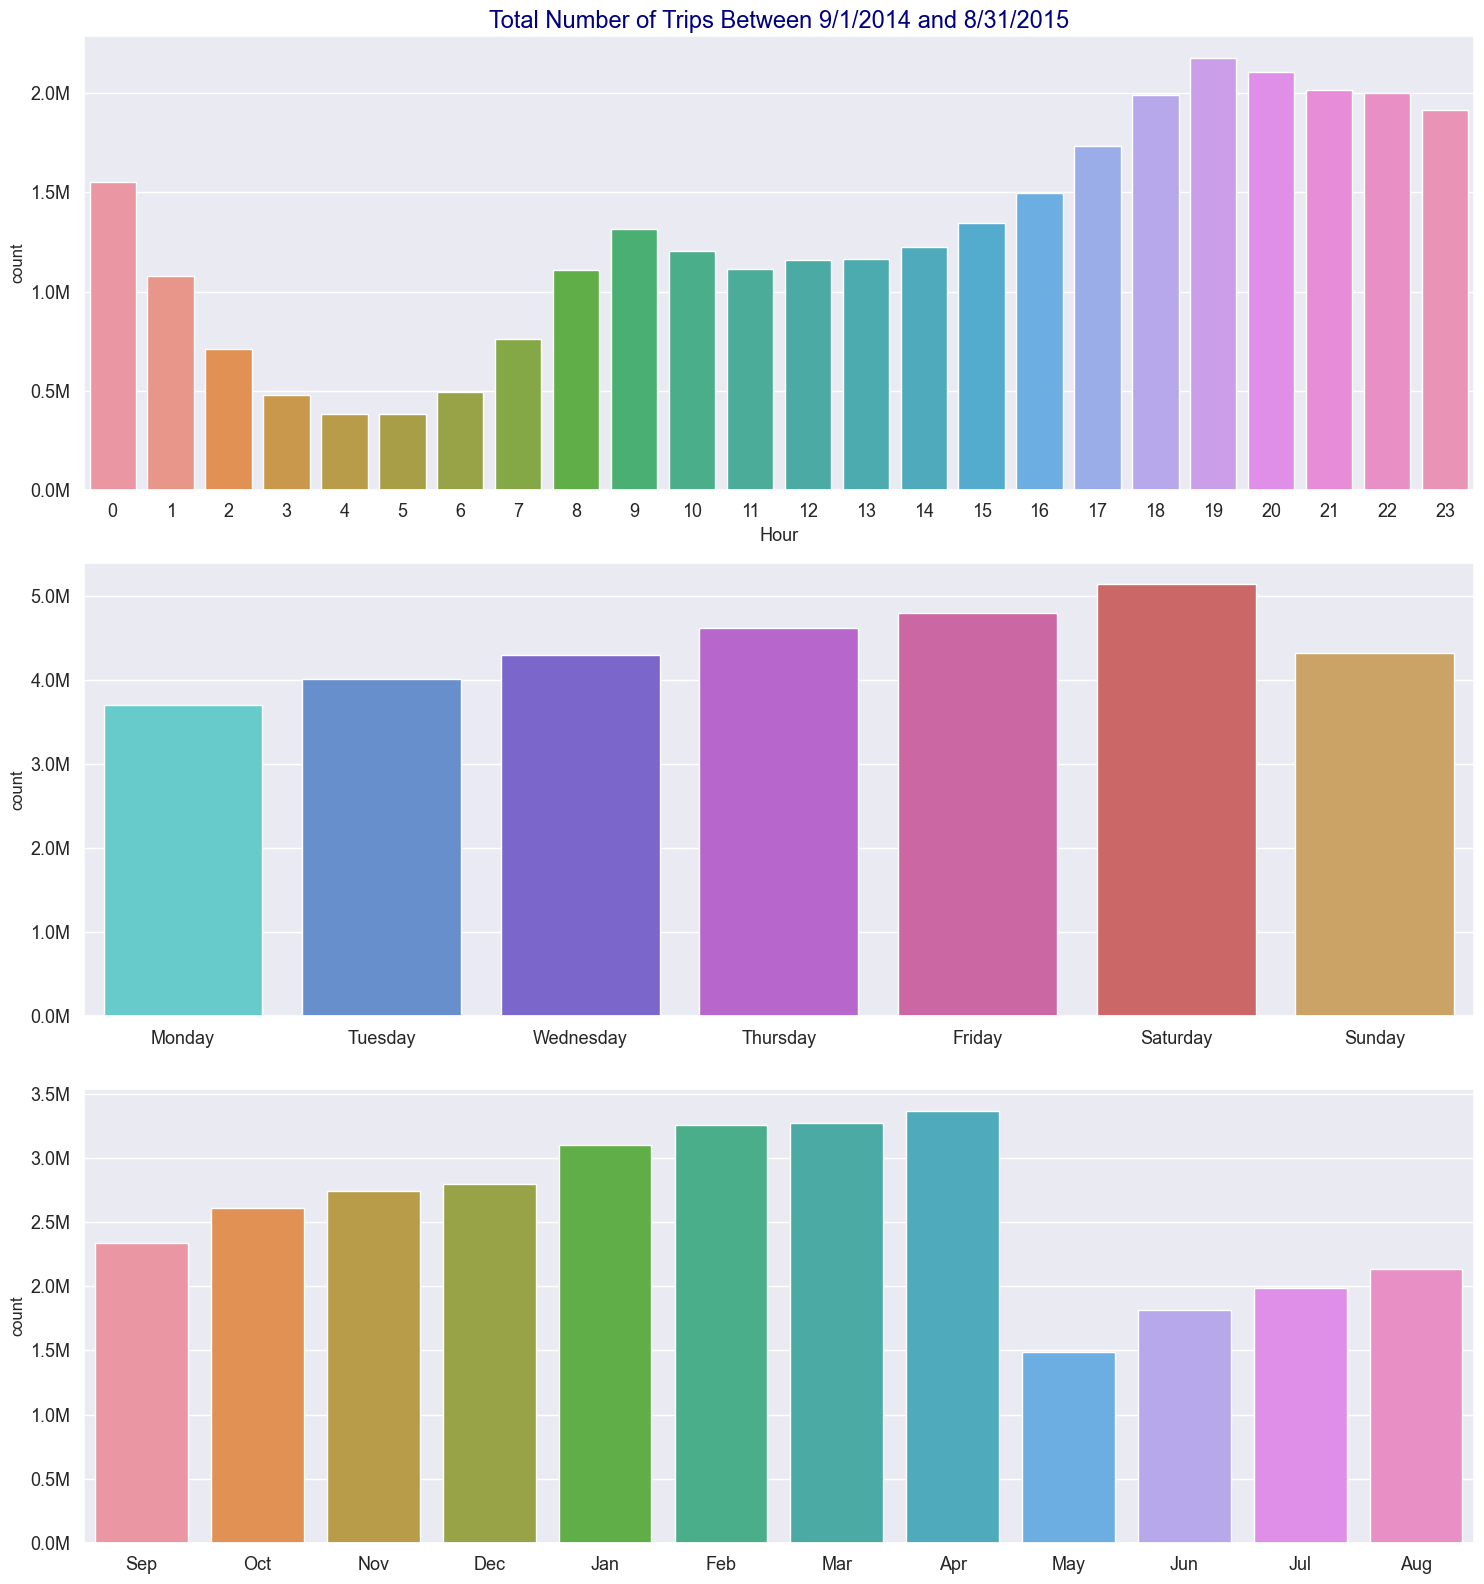

In [79]:
fig = plt.figure(figsize=(15, 16))
formatter = FuncFormatter(millions_format)

plt.subplot(3, 1, 1)
ax1 = sns.countplot(data=df_viz, x='hour', order=range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 9/1/2014 and 8/31/2015', fontsize=17, color='navy')
plt.xlabel('Hour', fontsize=13)

plt.subplot(3, 1, 2)
ax2 = sns.countplot(data=df_viz, x='weekday', order=range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')

plt.subplot(3, 1, 3)
ax3 = sns.countplot(data=df_viz, x='month')
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')

plt.tight_layout()  
plt.show()


Estimated Monthly Base Revenue: how much was the NYC market worth in the period?

In [80]:
byDateRev = df_viz.groupby('month')['est_revenue'].sum()

In [82]:


sumRev = byDateRev.sum()
print("Base Revenue: ${:,.0f}M".format(sumRev * 1e-6), "Uber's Base Gross Margin: ${:,.0f}".format(sumRev * .25))

Base Revenue: $595M Uber's Base Gross Margin: $148,766,619


In [83]:
byDateRev.head()

month
1    4.145715e+07
2    4.725285e+07
3    5.215439e+07
4    5.409507e+07
5    6.153991e+07
Name: est_revenue, dtype: float64

In [84]:
sumRev= byDateRev.sum()
sumRev

595066477.5641053

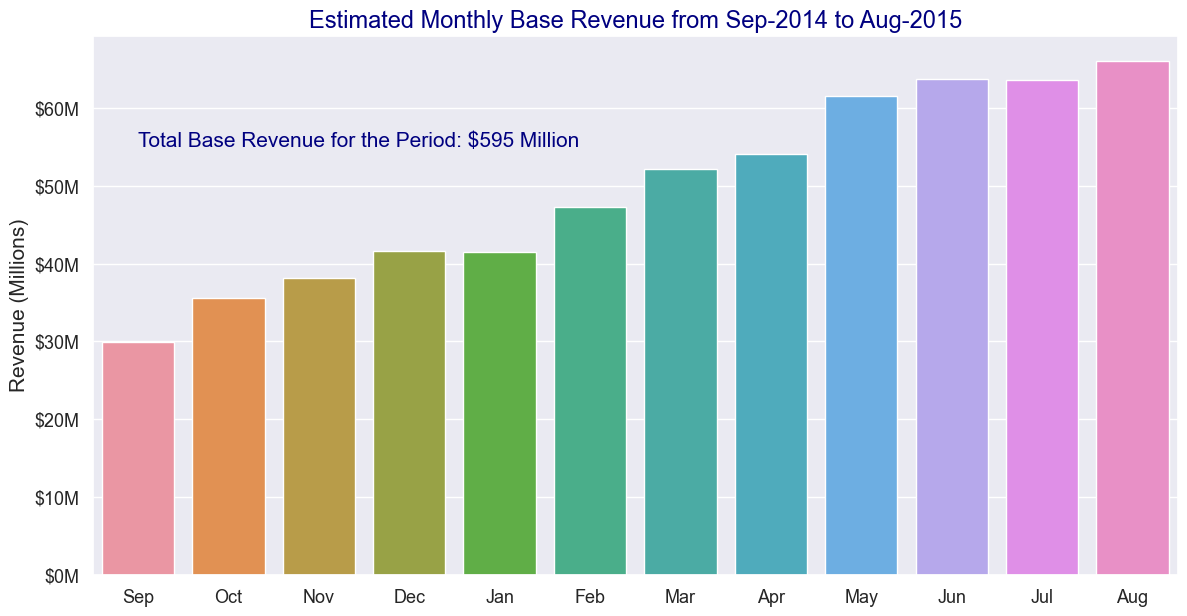

In [85]:

def millions_currency(x, pos):
    return "${:,.0f}M".format(x * 1e-6)


months_seq = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']  
plt.figure(figsize=(14, 7))
formatter = FuncFormatter(millions_currency)

ax = sns.barplot(x=byDateRev.index, y= byDateRev.values, order = months_seq)
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

font = {'color': 'navy', 'size': 15}
plt.text(0, 55000000, 'Total Base Revenue for the Period: ${:,.0f} Million'.format(sumRev * 1e-6),
         fontdict=font)
plt.xlabel('')
plt.ylabel('Revenue (Millions)', fontsize=15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize=17, color='navy')

plt.show()

In [86]:
df_viz.est_revenue.mean()

19.241863987639547

In [87]:
# month over month revenue percentage growth:
dict_growth = {}
for i in range(len(months_seq)):
    mo = months_seq[i]
    rev = byDateRev[mo]
    if mo == 9:
        growth_pct = 0
    elif mo == 1:
        growth_pct = ((rev/byDateRev[12]) - 1) * 100
    else:
        growth_pct = ((rev/byDateRev[mo - 1]) - 1) * 100
    print(month_labels[i], 'Revenue =', '${:,.0f}'.format(rev), 'Growth % = ', '{:.1f}%'.format(growth_pct))
    dict_growth[month_labels[i]] = growth_pct

Sep Revenue = $29,967,741 Growth % =  0.0%
Oct Revenue = $35,531,001 Growth % =  18.6%
Nov Revenue = $38,170,687 Growth % =  7.4%
Dec Revenue = $41,661,569 Growth % =  9.1%
Jan Revenue = $41,457,151 Growth % =  -0.5%
Feb Revenue = $47,252,852 Growth % =  14.0%
Mar Revenue = $52,154,385 Growth % =  10.4%
Apr Revenue = $54,095,066 Growth % =  3.7%
May Revenue = $61,539,912 Growth % =  13.8%
Jun Revenue = $63,667,666 Growth % =  3.5%
Jul Revenue = $63,607,348 Growth % =  -0.1%
Aug Revenue = $65,961,099 Growth % =  3.7%


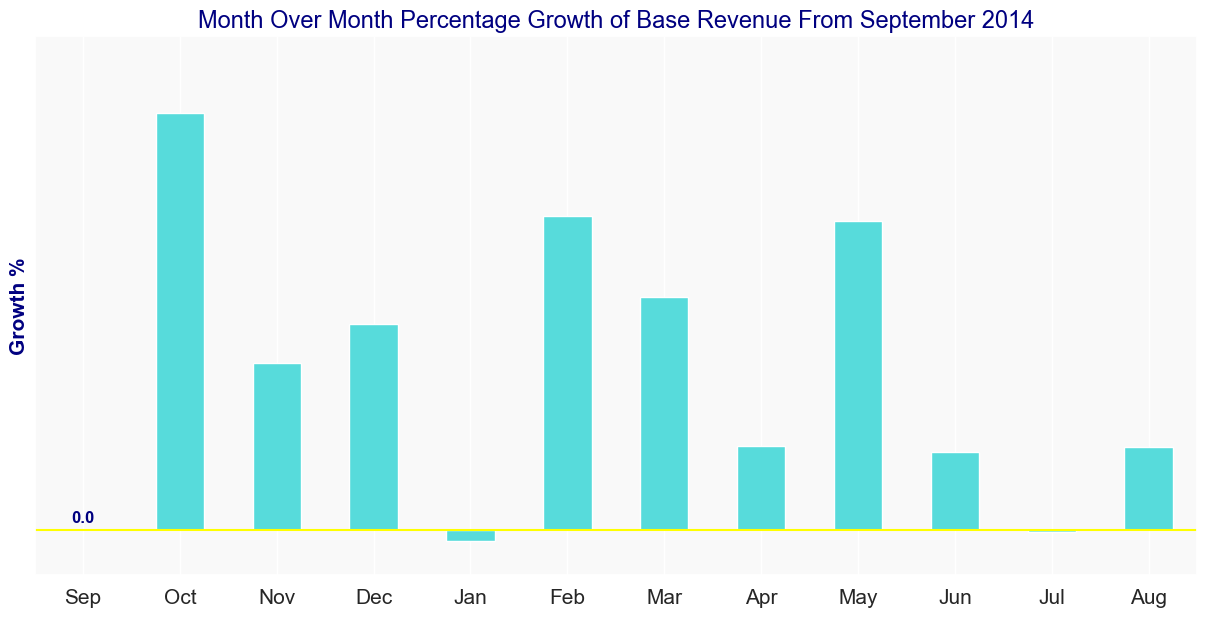

In [88]:
# Total Cummulative Growth for the Period

df_plt1 = pd.DataFrame(pd.Series(dict_growth), index = month_labels, columns = ['growth_pct'])

labels_list = df_plt1.growth_pct.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt1.plot(kind = 'bar', figsize = (15,7), fontsize = 14, rot = 0, legend=False)
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.axhline(0, color='yellow')
plt.title('Month Over Month Percentage Growth of Base Revenue From September 2014', 
          fontsize = 17, color='navy')
plt.ylabel('Growth %', fontsize = 15, weight='bold', color='navy')
plt.ylim(-2, 22)
plt.tick_params(labelsize=15)

plt.show()

Cummulative % Growth Over Period: 83.54793827524881


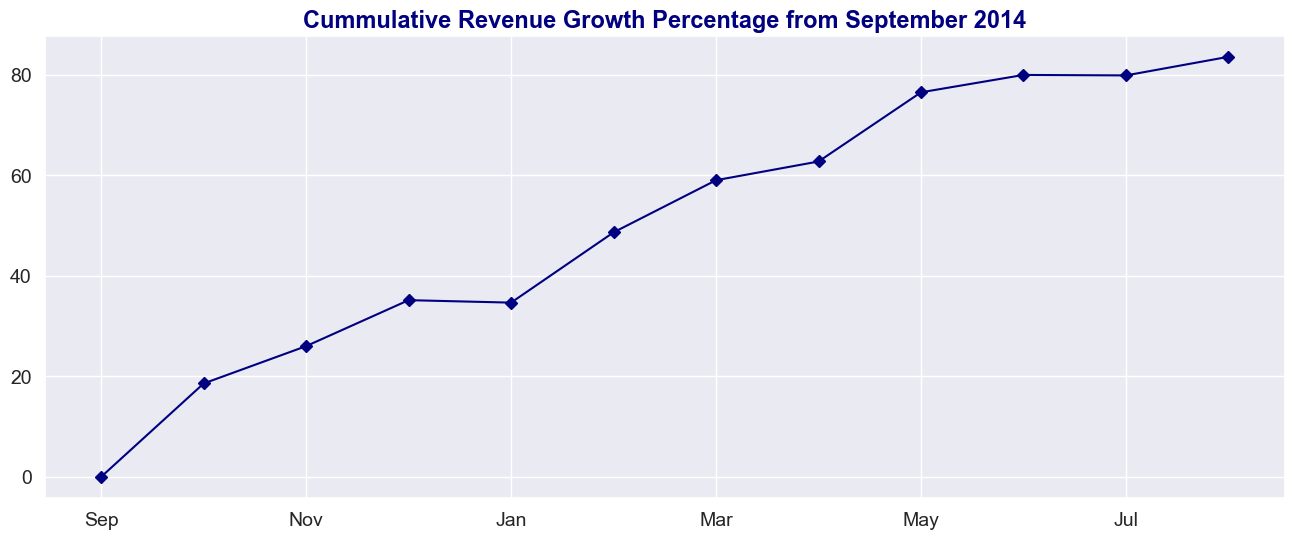

In [89]:
#Plot Cummulative Base Revenue Growth Over the Period
print('Cummulative % Growth Over Period:', df_plt1.growth_pct.sum())

df_plt1.cumsum().plot(color = 'navy', marker = 'D', legend = False, figsize=(16, 6))
plt.title('Cummulative Revenue Growth Percentage from September 2014', fontsize=17, weight='bold', color='navy')
plt.tick_params(labelsize=14)
plt.show()

What is the median distance traveled per trip

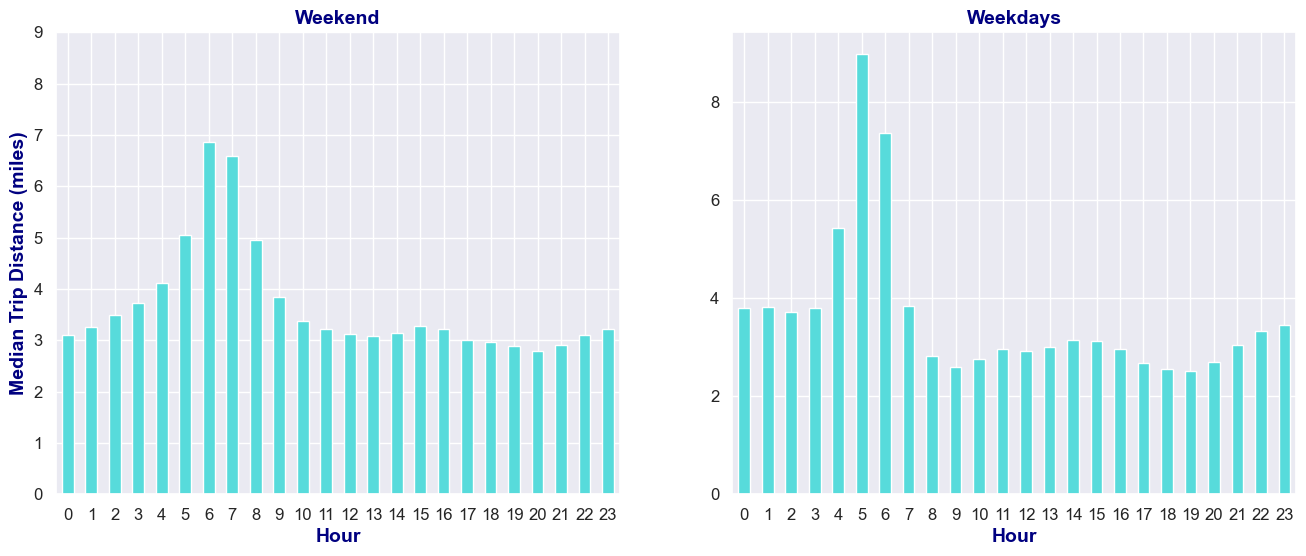

In [90]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
df_viz[(df_viz.weekday >= 5)].groupby('hour')['trip_distance'].median().plot(kind='bar', rot = 0, fontsize=14)
plt.ylim(0, 9)
plt.tick_params(labelsize=12)
plt.ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend', fontsize=14, weight='bold', color='navy')

plt.subplot(1,2,2)
df_viz[df_viz.weekday < 5].groupby('hour')['trip_distance'].median().plot(kind='bar', rot = 0)
plt.tick_params(labelsize=12)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()

What are the most popular pickup and drop-off taxi zones

C:\Users\hp\AppData\Local\Temp\ipykernel_15284\4065435325.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
C:\Users\hp\AppData\Local\Temp\ipykernel_15284\4065435325.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])


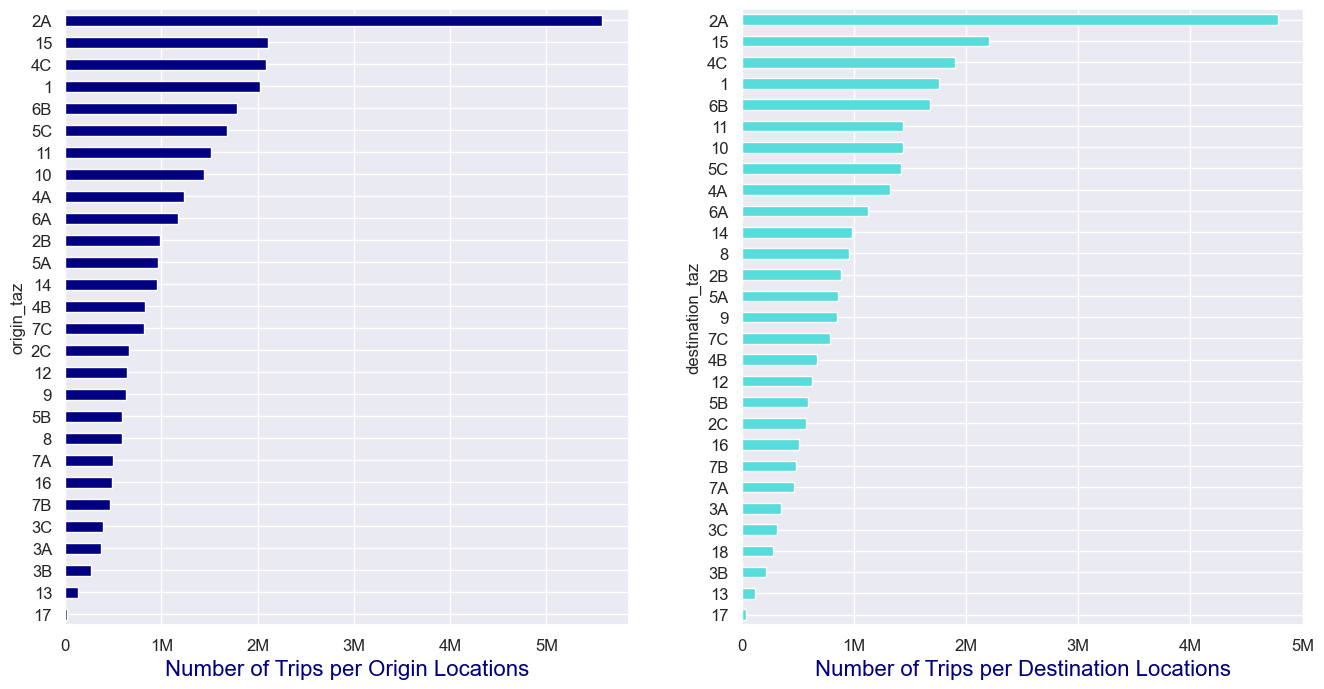

In [91]:
fig = plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
ax1 = df_viz.origin_taz.value_counts(ascending = True).plot(kind = 'barh', color = 'navy')
ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Origin Locations', fontsize = 16, color='navy')

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
ax2 = df_viz.destination_taz.value_counts(ascending = True).plot(kind = 'barh')
ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Destination Locations', fontsize = 16, color='navy')

plt.show()

In [92]:
#Percentage of trips represented by the top five origins/destinations:
print(df_viz.origin_taz.value_counts().head(5).sum()/float(len(df_viz))) #13,583,249
print(df_viz.destination_taz.value_counts().head(5).sum()/float(len(df_viz[df_viz.destination_taz.isnull() == False])))                                                         

0.4392216937318789
0.41585189564289543


In [93]:
#Total pickups or drop-offs within any combination of the top 5 locations: 6231353 (20% of the total trips)
len(df_viz[(df_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & 
           (df_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231752

In [94]:
# 29% of all trips start or finish at 2A:
len(df_viz[(df_viz.origin_taz == '2A') | (df_viz.destination_taz == '2A')])/(1.0*len(df_viz)) 

0.29038433027120075

In [95]:
df_plt3 = df_viz.pivot_table('id', aggfunc='count', index='origin_taz', columns='destination_taz')

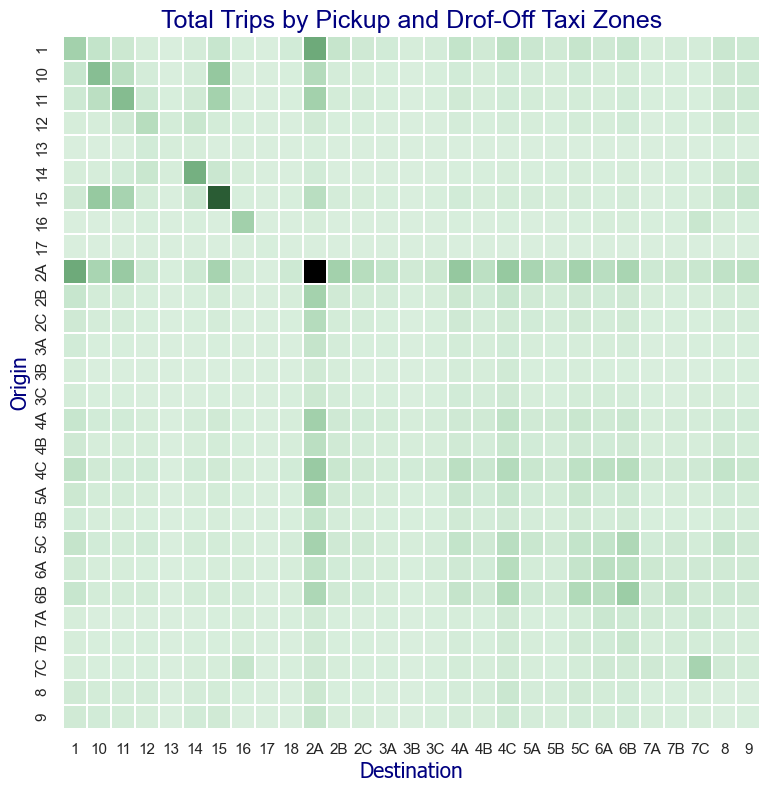

In [96]:
fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()

In [97]:
# he mean time and distance to destination from the most popular pick up location
df_plt4 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['trip_distance'].mean().sort_values()
df_plt5 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['duration_min'].mean().sort_values()

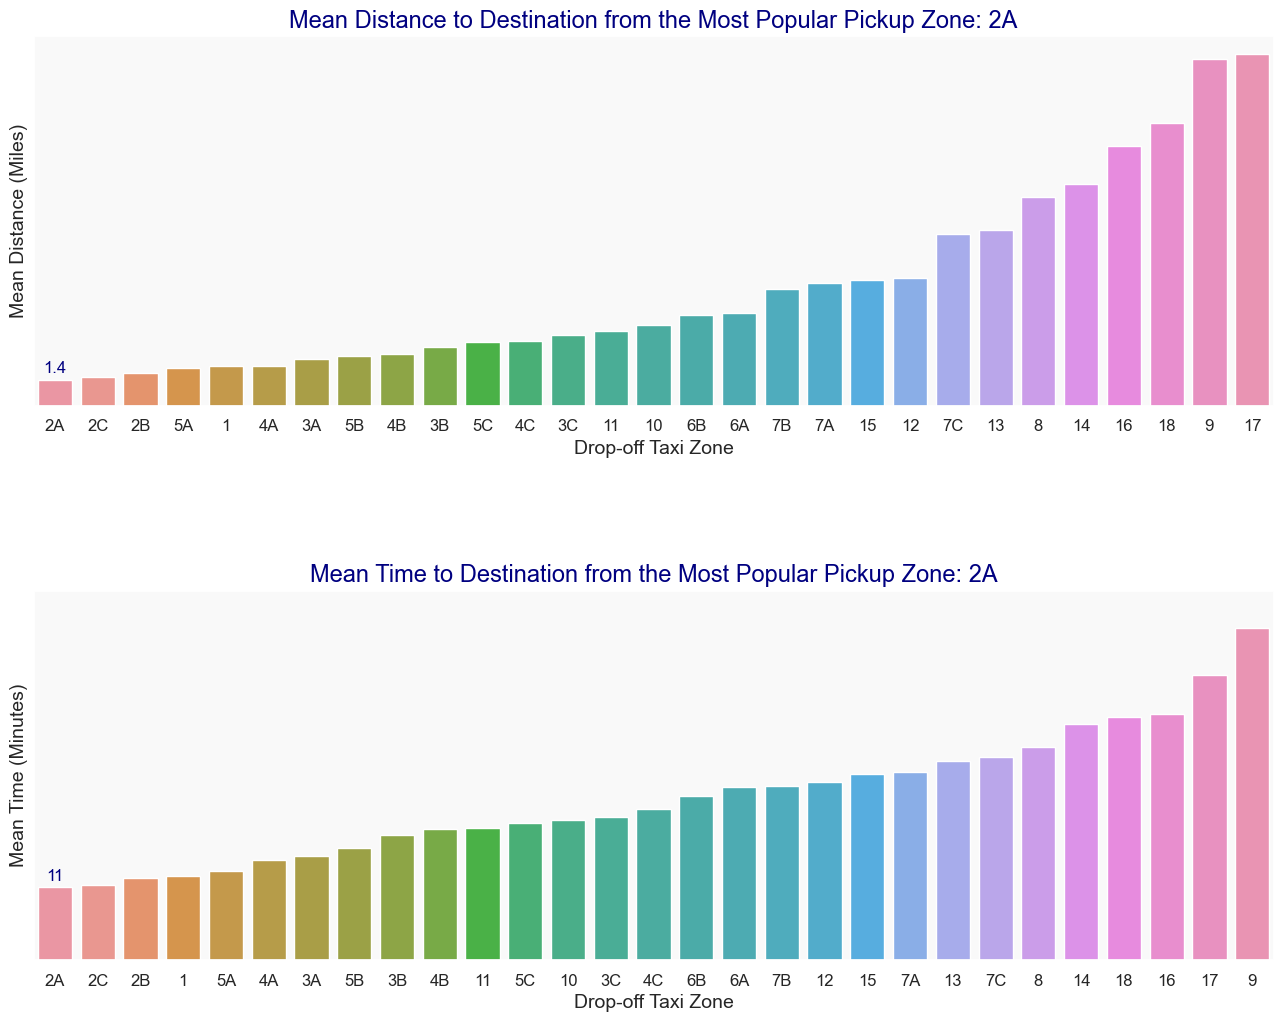

In [98]:
fig = plt.figure(figsize = (16,12))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


plt.subplot(2,1,1)
ax1 = sns.barplot(x=df_plt4.index, y=df_plt4.values)
ax1.set_facecolor('#F9F9F9')

ax1.get_yaxis().set_ticks([])
labels_list = df_plt4.values.round(1)
annotate_labels(ax1, labels_list, **kwargs)
plt.title('Mean Distance to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Distance (Miles)', fontsize = 14)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


plt.subplot(2,1,2)
ax2 = sns.barplot(x=df_plt5.index, y=df_plt5.values)
ax2.set_facecolor('#F9F9F9')

ax2.get_yaxis().set_ticks([])
labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
annotate_labels(ax2, labels_list, **kwargs)
plt.title('Mean Time to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Time (Minutes)', fontsize = 14)
plt.ylim(0,55)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


fig.subplots_adjust(hspace=.5)
plt.show()

In [107]:
# Distribution of trip distance

In [102]:
df_viz.trip_distance.max(), df_uber.trip_distance.max()

(568.57, 2593.08)

In [103]:
freq, bins_dist = np.histogram(df_viz.trip_distance, bins=10, range=(0, 25))
freq, bins_dist

(array([12709827,  8364570,  3567013,  2035400,  1296935,   672724,
          706029,   747773,   299952,   132574], dtype=int64),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]))

In [104]:
for val in freq:
    print(float(val)/sum(freq))

0.4162680215638286
0.27395361125939427
0.11682562196971343
0.06666274301695976
0.042476783243932746
0.022032832432613364
0.02312362670213279
0.024490812289486612
0.009823928020744381
0.004342019501194077


In [105]:
df_viz.trip_distance.median(), df_viz.trip_distance.mean()

(3.09, 5.199671270671474)

In [106]:
print(len(df_viz[df_viz.trip_distance <= 5])/(1.0 *len(df_viz))) #68% of trips are 5 miles or less
print(len(df_viz[df_viz.trip_distance <= 2])/(1.0 *len(df_viz))) #32% of trips are 2 miles or less


0.6821346964320677
0.3192324550376767


In [108]:
#Vey long distance trips (>= 300 miles):
df_viz[df_viz.trip_distance >= 300].head(10)

,id,origin_taz,destination_taz,trip_distance,pu_date,year,month,day,hour,weekday,duration_min,trip_mph_avg,est_revenue
943214,19594602,10,15,371.55,2014-09-16,2014,9,16,10,1,474.283333,47.003549,818.761667
3620586,5138875,14,NaN,357.27,2014-11-04,2014,11,4,23,1,309.516667,69.257014,736.103333
10581718,10072444,16,NaN,330.90,2015-02-04,2015,2,4,18,2,648.500000,30.615266,808.600000
11224977,17353914,15,15,378.01,2015-02-25,2015,2,25,15,2,600.766667,37.752760,874.335833
11684172,23119455,14,14,350.15,2015-02-03,2015,2,3,18,1,559.350000,37.559667,811.085000
13829799,16426984,15,NaN,568.57,2015-03-27,2015,3,27,19,4,652.316667,52.296993,1225.858333
16530542,15478567,7A,17,315.57,2015-04-09,2015,4,9,1,3,248.066667,76.327063,641.620833
18643154,6860856,5C,16,308.42,2015-05-31,2015,5,31,5,6,304.183333,60.835680,648.749167
18854980,9245564,15,15,302.79,2015-05-10,2015,5,10,22,6,441.666667,41.133736,687.015833
18949729,10208984,4A,7C,335.30,2015-05-09,2015,5,9,16,5,813.666667,24.725113,874.108333


In [ ]:
# Distribution of trip duration (in minutes)

In [99]:
df_viz.duration_min.describe()

count    3.092562e+07
mean     2.099209e+01
std      1.608435e+01
min      0.000000e+00
25%      1.085000e+01
50%      1.723333e+01
75%      2.668333e+01
max      9.593000e+02
Name: duration_min, dtype: float64

In [100]:
freq, bins_dur = np.histogram(df_viz.duration_min, bins=10, range=(0, 50))
freq, bins_dur

(array([1235201, 5391527, 6312324, 5266965, 3929223, 2777187, 1878407,
        1256167,  852543,  589921], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

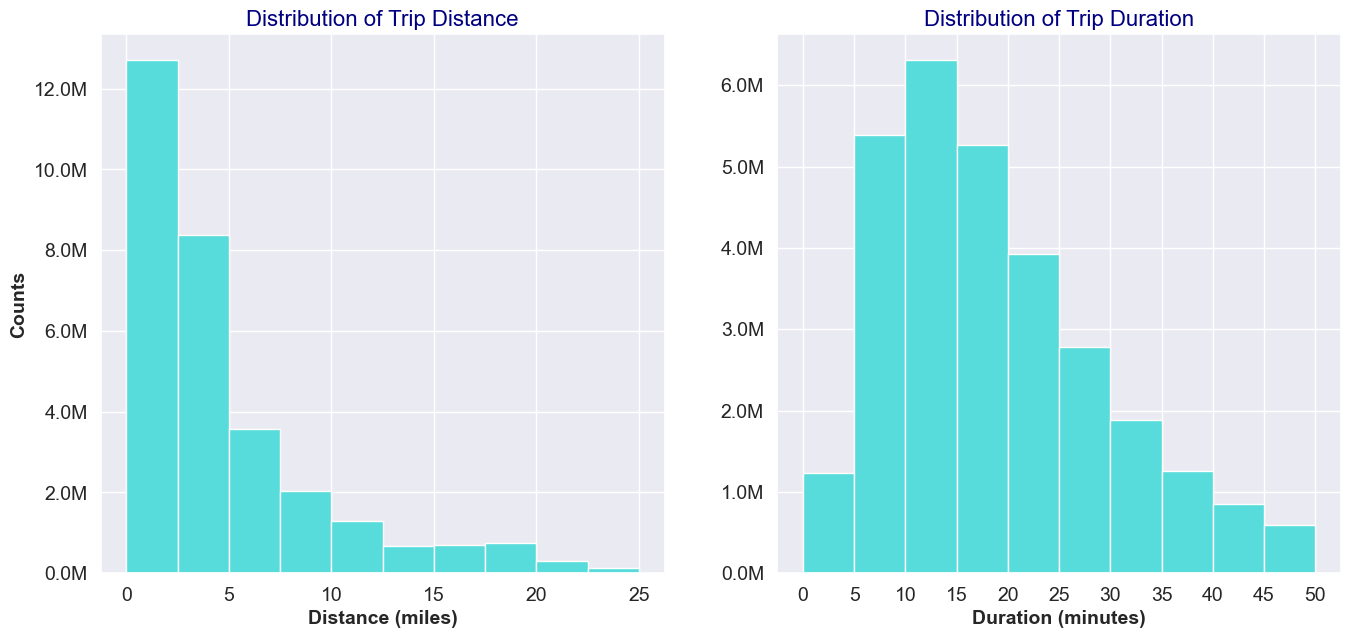

In [109]:
fig = plt.figure(figsize=(16, 7))

formatter = FuncFormatter(millions_format)

plt.subplot(1,2,1)
ax1 = df_viz.trip_distance.dropna().hist(bins=bins_dist)
ax1.yaxis.set_major_formatter(formatter)

plt.xlabel('Distance (miles)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Distance', color='navy', fontsize=16)


plt.subplot(1,2,2)
ax2 = df_viz.duration_min.hist(bins=bins_dur)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_xticks(bins_dur) #bins are in 5 minutes intervals.

plt.xlabel('Duration (minutes)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Duration', color='navy', fontsize=16)

plt.show()

In [ ]:
# Distribution of the average speed per trip

In [110]:
df_viz.trip_mph_avg.describe()

count    3.090075e+07
mean     1.350735e+01
std      1.175680e+01
min      0.000000e+00
25%      8.410012e+00
50%      1.144891e+01
75%      1.626687e+01
max      2.254800e+04
Name: trip_mph_avg, dtype: float64

In [111]:
freq, bins = np.histogram(df_viz.trip_mph_avg, bins=10, range=(0, 50))
freq, bins

(array([ 1313452, 10564985,  9862416,  4248624,  2152852,  1282011,
          767843,   434359,   196184,    61865], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

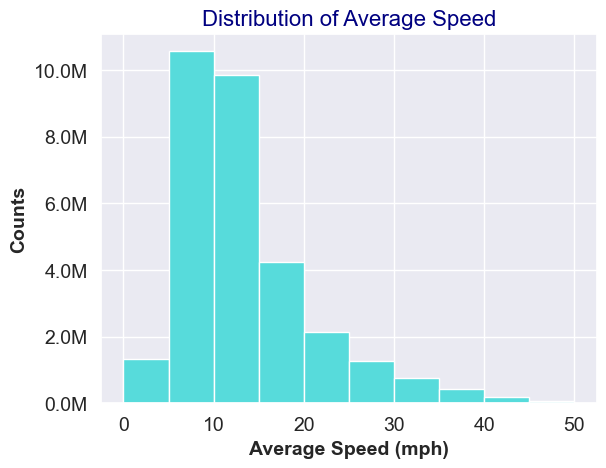

In [112]:
fig, ax = plt.subplots(1,1)

formatter = FuncFormatter(millions_format)

ax.hist(df_viz.trip_mph_avg.dropna(), bins)
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('Average Speed (mph)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()